# Import Libearies and Data

Import Packages and Libraries

In [ ]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

import numpy as np #Linear Algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
% matplotlib inline

from textblob import TextBlob

#Input data files are available in the "../input/" directory.
#For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#To print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

Import and Visualize Data

In [ ]:
df = pd.read_excel('Comments_Data_Extracts_01.xlsx')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  9546 non-null   object
dtypes: object(1)
memory usage: 74.7+ KB


(9546, 1)

In [ ]:
df.head()
df.columns
len(df)

,Comments
0,I just bought this projector and i am clueless...
1,You promised me a multi card reader for leavin...
2,"Hello Apeman, your team is not responding to m..."
3,"Great picture, I am so excited about looking f..."
4,I have just bought the Apeman 550 dashcam and ...


Index(['Comments'], dtype='object')

9546

In [ ]:
print(df)

                                               Comments
0     I just bought this projector and i am clueless...
1     You promised me a multi card reader for leavin...
2     Hello Apeman, your team is not responding to m...
3     Great picture, I am so excited about looking f...
4     I have just bought the Apeman 550 dashcam and ...
...                                                 ...
9541  Did You see it? 🙈https://t.co/X1b3ZyrGbeLet th...
9542  4inch FHD 1080P DVR camera RecorderWhatsApp/We...
9543  📷 4inch FHD 1080P DVR camera Recorder WhatsApp...
9544  #autobrighttech #AutobrightTech #caraccessorie...
9545  📷 #autobrighttech #AutobrightTech #caraccessor...

[9546 rows x 1 columns]


# Text Preprocessing & EDA

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 9546): # iterate through the list of all 9546 comments
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  df_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',df.Comments[i])
  # convert all words to lower case
  df_cln = df_cln.lower()
  # split sentences into words
  df_cln = df_cln.split()
  # remove English stop words
  df_cln = [x for x in df_cln if not x in stop_words]
  # stem words to the base form
  df_cln = [ps.stem(x) for x in df_cln]
  # join words to form the original sentences
  df_cln = " ".join(df_cln)
  # append to the list to get all Comments in one place
  corpus.append(df_cln)
#print(corpus)

# POS Tagging

In [ ]:
import os
import numpy as np

import pandas as pd
from tqdm import tqdm
tqdm.pandas()

from nltk import word_tokenize, pos_tag
from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()
pos_tags = df['Comments'].progress_apply(lambda x: pos_tag(word_tokenize(x)))
targets = df['Comments']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
print(pos_tags[100])

[('Full', 'NNP'), ('link', 'NN'), ('in', 'IN'), ('bio', 'NN'), ('☠🏆🚔🚨📸🎥', 'NNP'), ('#', '#'), ('london', 'RB'), ('#', '#'), ('dashcam', 'JJ'), ('#', '#'), ('driving', 'VBG'), ('#', '#'), ('ukdashcams', 'JJ'), ('#', '#'), ('ukbikers', 'NNS'), ('#', '#'), ('fails', 'NNS'), ('#', '#'), ('dashcamfails', 'NNS'), ('#', '#'), ('drivingfails', 'NNS'), ('#', '#'), ('roadrage', 'NN'), ('#', '#'), ('drivesafe', 'JJ'), ('#', '#'), ('roadsafetyawareness', 'JJ'), ('#', '#'), ('apemandashcam', 'JJ'), ('#', '#'), ('apemancamera', 'NN'), ('#', '#'), ('sonyvegas', 'JJ'), ('#', '#'), ('videoedits', 'NNS'), ('#', '#'), ('editfun…', 'JJ'), ('https', 'NN'), (':', ':'), ('//t.co/fknBB6GVS9', 'NN')]


In [ ]:
tags = []
for i, tag in enumerate(pos_tags):
    pos_tags[i] = list(map(list, tag))
    tags.append(np.array(pos_tags[i])[:, 1])
flat_tags = np.concatenate([tag for tag in tags])

In [ ]:
counts = [dict(Counter(tag)) for tag in tags]

In [ ]:
DATA_LEN = 1804874
SAMPLE_SIZE = 9546
all_tags = set(flat_tags)
df = pd.DataFrame(np.zeros((SAMPLE_SIZE, 1)))
df.columns = ['Comments']
df.count_dict = counts
df.target = targets

# Bag Of Words

In [ ]:
bagofwords=[]
for i in range (0,9546):
    words = corpus[i].split()
    bagofwords.append(words)

In [ ]:
bagofwords[9545]

['autobrighttech',
 'autobrighttech',
 'caraccessori',
 'autoaccessori',
 'otoaccessori',
 'vehicleaccessori',
 'dvr',
 'dvrcamera',
 'dvr',
 'dvr',
 'dvr',
 'dvrl',
 'carcamera',
 'carcamerarecord',
 'carcamerajapan',
 'carcamera',
 'carcamera']

In [ ]:
import itertools
import collections
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:9546])
print()
print('Most commonly occuring words and frequency\n')
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['bought', 'projector', 'clueless', 'connect', 'iphon', 'promis', 'multi', 'card', 'reader', 'leav', 'review', 'im', 'still', 'wait', 'susi', 'hello', 'apeman', 'team', 'respond', 'email', 'fix', 'issu', 'multipl', 'follow', 'up', 'great', 'pictur', 'excit', 'look', 'k', 'camerajust', 'need', 'price', 'come', 'littl', 'look', 'forward', 'futur', 'adventur', 'run', 'camera', 'thejogshop', 'brighton', 'runningrunp', 'puresportsperformac', 'ukrunchat', 'bought', 'apeman', 'dashcam', 'find', 'rear', 'camer', 'cabl', 'metr', 'short', 'anyon', 'got', 'idea', 'get', 'short', 'extens', 'possibl', 'tri', 'price', 'terribl', 'compani', 'product', 'china', 'sayhidden', 'design', 'hid', 'hello', 'camera', 'apeman', 'app', 'use', 'wifi', 'bad', 'news', 'apeman', 'put', 'mine', 'garbag', 'done', 'cheap', 'product', 'good', 'trailcam', 'got', 'apeman', 'excel', 'may', 'know', 'price', 'ill', 'test', 'c', 'dash', 'cam', 'advertis', 'say', 'card', 'includedbuy', 'person', 'could', 'order', 'one', 'time

[('gadget', 2611),
 ('car', 1031),
 ('tech', 741),
 ('new', 549),
 ('electriccar', 509),
 ('via', 453),
 ('electr', 432),
 ('technolog', 424),
 ('autonomousvehicl', 415),
 ('smart', 378),
 ('watch', 374),
 ('camera', 372),
 ('travel', 337),
 ('electron', 336),
 ('use', 305),
 ('selfdriv', 283),
 ('amp', 282),
 ('drive', 280),
 ('autonom', 279),
 ('vehicl', 272)]

# Word Frequency

In [ ]:
freq_word_df = pd.DataFrame(words_freq.most_common(20),columns=['words','Freq'])
freq_word_df.head()

,words,Freq
0,gadget,2611
1,car,1031
2,tech,741
3,new,549
4,electriccar,509


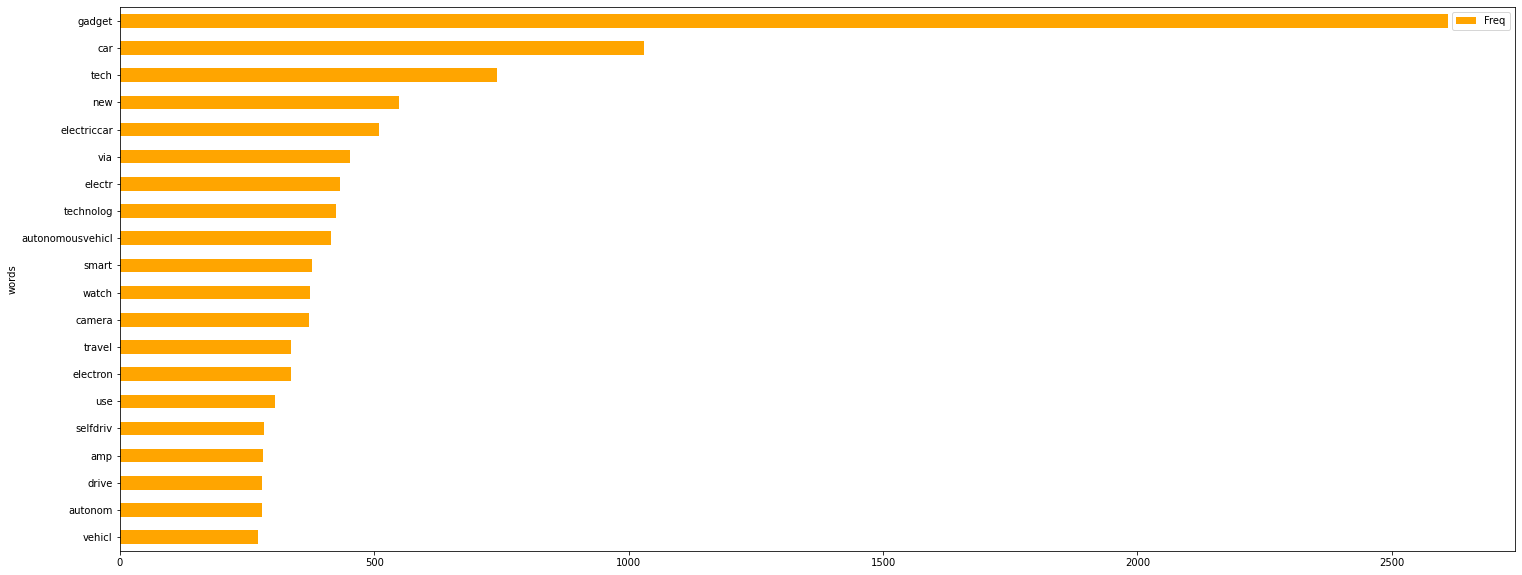

In [ ]:
fig,ax=plt.subplots(figsize=(25,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='words',y='Freq',ax=ax,color='orange')
plt.show();

# Word Frequency

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
word_string=' '.join(freq_word_df.words)
wordcloud=WordCloud(#stopwords=STOPWORDS,
                       background_color='black',
                     max_words=20
                      ).generate(word_string)

<Figure size 1080x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

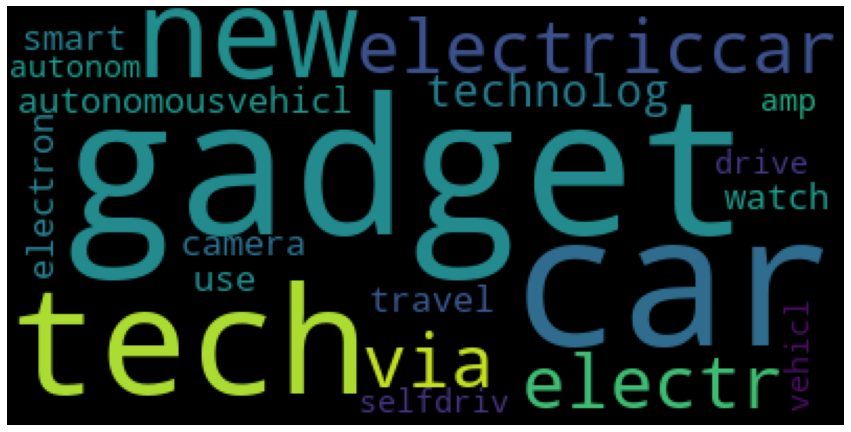

In [ ]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Polarity by TextBlob

In [ ]:
sentiment_text = [TextBlob(Comments) for Comments in corpus]
print(sentiment_text[10].polarity)
print(sentiment_text[10])

-0.1499999999999999
bad news apeman put mine garbag done cheap product


In [ ]:
sentiments = [[Comments.sentiment.polarity, str(Comments)] for Comments in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=["Polarity","UserComments"])
sentiment_df.sort_values(by='Polarity',ascending=False) 

,Polarity,UserComments
5626,1.0,digitalchamb gadget hardwar review tc adobelig...
9059,1.0,best ball sincebal
414,1.0,tell truth princ ea one best messag yet watch ...
9273,1.0,best size buck
425,1.0,laughter best medicin amp headlin deliv infota...
...,...,...
2190,-0.8,googl interest hardwar announc rank googl
2898,-0.8,scienc confirm consum hate overcook pork chop ...
832,-1.0,evil lurk night alexhest evil almost readi ssa...
6747,-1.0,bleak futur singleoccup autonom car could incr...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e19e55358>],
      dtype=object)

Text(0.5, 1.0, 'Sentiments Distribution on Automotive Gadgets')

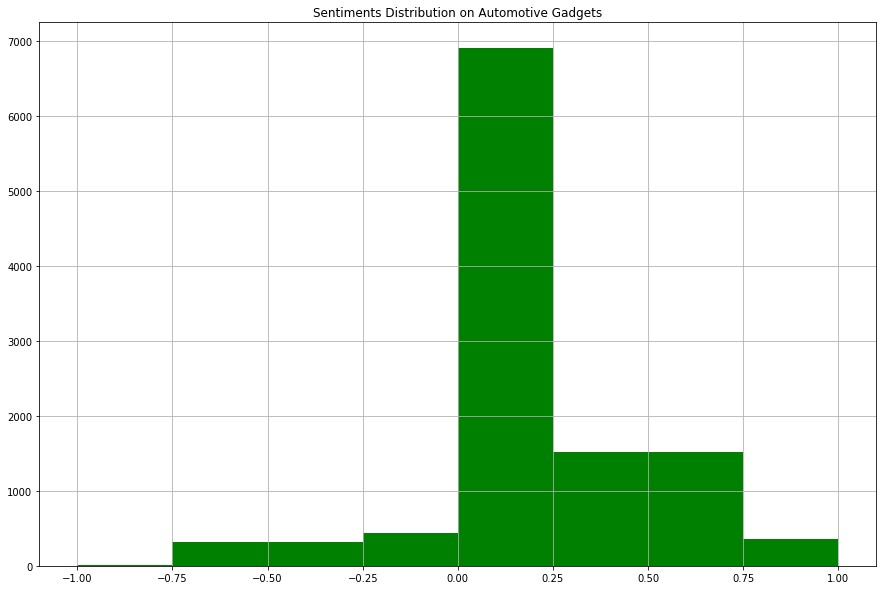

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

#Plot histogram of the polarity values
sentiment_df.hist(bins=[-1.0, -0.75, -0.25, 0, 0.25, 0.75, 1.0], ax=ax, color="green")
plt.title("Sentiments Distribution on Automotive Gadgets")
plt.show()

# Category from Polarity

In [ ]:
sentiment_df.groupby('Polarity').size()

Polarity
-1.00      3
-0.80     11
-0.70      8
-0.60      2
-0.60      6
        ... 
 0.75     17
 0.80    205
 0.85      1
 0.90      9
 1.00    124
Length: 449, dtype: int64

In [ ]:
bins=(-1.0,0.0,1.0)
names=['Negative','Positive']
sentiment_df['Category']=pd.cut(sentiment_df['Polarity'],bins,labels=names)

In [ ]:
sentiment_df.groupby('Category').size()

Category
Negative    6293
Positive    3250
dtype: int64

In [ ]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Polarity      9546 non-null   float64 
 1   UserComments  9546 non-null   object  
 2   Category      9543 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 158.7+ KB


In [ ]:
sentiment_df

,Polarity,UserComments,Category
0,0.0,bought projector clueless connect iphon,Negative
1,0.0,promis multi card reader leav review im still ...,Negative
2,0.0,hello apeman team respond email fix issu multi...,Negative
3,0.8,great pictur excit look k camerajust need pric...,Positive
4,0.0,bought apeman dashcam find rear camer cabl met...,Negative
...,...,...,...
9541,0.3,see fun begin xboxnintendoswitch playstat,Positive
9542,0.0,inch fhd p dvr camera recorderwhatsappwechat a...,Negative
9543,0.0,inch fhd p dvr camera record whatsappwechat au...,Negative
9544,0.0,autobrighttech autobrighttech caraccessori aut...,Negative


In [ ]:
sentiment_df.columns

Index(['Polarity', 'UserComments', 'Category'], dtype='object')

In [ ]:
dfp = pd.DataFrame(data=sentiment_df,
                    columns=['Polarity', 'UserComments', 'Category'])
dfp

,Polarity,UserComments,Category
0,0.0,bought projector clueless connect iphon,Negative
1,0.0,promis multi card reader leav review im still ...,Negative
2,0.0,hello apeman team respond email fix issu multi...,Negative
3,0.8,great pictur excit look k camerajust need pric...,Positive
4,0.0,bought apeman dashcam find rear camer cabl met...,Negative
...,...,...,...
9541,0.3,see fun begin xboxnintendoswitch playstat,Positive
9542,0.0,inch fhd p dvr camera recorderwhatsappwechat a...,Negative
9543,0.0,inch fhd p dvr camera record whatsappwechat au...,Negative
9544,0.0,autobrighttech autobrighttech caraccessori aut...,Negative


Identify & Treat NaN

In [ ]:
pandas.isnull(dfp)

,Polarity,UserComments,Category
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9541,False,False,False
9542,False,False,False
9543,False,False,False
9544,False,False,False


In [ ]:
# importing pandas package
import pandas as pd

# making data frame from excel file
#dataN = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# creating bool series True for NaN values
#dataN_series = pd.isnull(dataN["Polarity_type"])
dataN_series = pd.isnull(dfp["Category"])

# filtering data
# displayind data only with team = NaN
#dataN[dataN_series]
dfp[dataN_series]

,Polarity,UserComments,Category
832,-1.0,evil lurk night alexhest evil almost readi ssa...,NaN
5747,-1.0,worst case autonom futur requir pedestrian bic...,NaN
6747,-1.0,bleak futur singleoccup autonom car could incr...,NaN


In [ ]:
# importing pandas module 
import pandas as pd 

# making data frame from csv file 
#dataN2 = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# replacing na values in college with No college 
#dataN2["Polarity_type"].fillna("Negative", inplace = True) 
dfp["Category"].fillna("Negative", inplace = True)

dfp

,Polarity,UserComments,Category
0,0.0,bought projector clueless connect iphon,Negative
1,0.0,promis multi card reader leav review im still ...,Negative
2,0.0,hello apeman team respond email fix issu multi...,Negative
3,0.8,great pictur excit look k camerajust need pric...,Positive
4,0.0,bought apeman dashcam find rear camer cabl met...,Negative
...,...,...,...
9541,0.3,see fun begin xboxnintendoswitch playstat,Positive
9542,0.0,inch fhd p dvr camera recorderwhatsappwechat a...,Negative
9543,0.0,inch fhd p dvr camera record whatsappwechat au...,Negative
9544,0.0,autobrighttech autobrighttech caraccessori aut...,Negative


In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Polarity      9546 non-null   float64 
 1   UserComments  9546 non-null   object  
 2   Category      9546 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 158.7+ KB


In [ ]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('export_User_Comments_Polarity_Category_TextBlob.xlsx')
dfp.to_excel(writer,'Sheet1',index=False)
writer.save()

# Prediction Models

In [ ]:
df_p = pd.read_excel('/content/export_User_Comments_Polarity_Category_TextBlob.xlsx')
df_p.info()
df_p.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Polarity      9540 non-null   float64
 1   UserComments  9540 non-null   object 
 2   Category      9540 non-null   object 
dtypes: float64(1), object(2)
memory usage: 223.7+ KB


(9540, 3)

<Figure size 720x720 with 0 Axes>

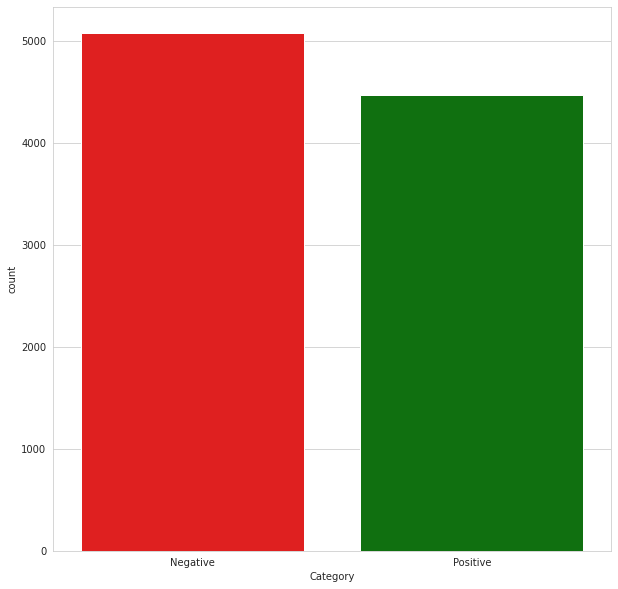

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Category", data=df_p, 
                  palette=dict(Positive="Green", Negative="Red"))

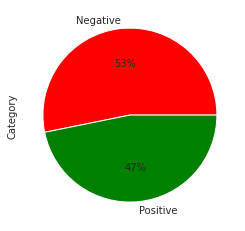

In [ ]:
df_p.Category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red","green"])

# Label Encoding

In [ ]:
#convert Polaty_type Negative, Positive to 0, 1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(df_p['Category'])

LabelEncoder()

In [ ]:
list(le.classes_)

['Negative', 'Positive']

In [ ]:
dfn = le.transform(df_p['Category'])

In [ ]:
le.inverse_transform([0,1])

array(['Negative', 'Positive'], dtype=object)

In [ ]:
df_p['Category'] = dfn
df_p.info()
df_p.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Polarity      9540 non-null   float64
 1   UserComments  9540 non-null   object 
 2   Category      9540 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 223.7+ KB


Index(['Polarity', 'UserComments', 'Category'], dtype='object')

In [ ]:
df_p[3500:3520]

,Polarity,UserComments,Category
3500,0.000000,fleec dog cloth pocket expawlor via amazingpro...,0
3501,0.000000,dog jacket winter windproof water migohi via a...,0
3502,-0.600000,dog jacket cold weather dog cloth pe phyxin vi...,0
3503,0.000000,reflect waterproof windproof dog co migohi via...,0
3504,0.000000,make easi technologytechnolog tech innov engin...,0
3505,-0.004545,new video ever use weird set wash machin watch...,0
3506,0.000000,check tech gadget watch gadget mobil arvshop,0
3507,-0.121212,mhet live esp mini kit modul wifibluetooth int...,0
3508,0.214286,amazon alexa smart ring wearabl gadget tool co...,1
3509,0.000000,wireless wifi repeat mbp nbg network wifi exte...,0


In [ ]:
train,test = train_test_split(df_p,test_size=0.25,random_state=42)

In [ ]:
train_clean_comment=[]
for comment in train['UserComments']:
    train_clean_comment.append(comment)
test_clean_comment=[]
for comment in test['UserComments']:
    test_clean_comment.append(comment)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_comment)
test_features=v.transform(test_clean_comment)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [ ]:
#Classifiers
Classifiers = [
    SVC(kernel="rbf", C=0.03, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),GaussianNB()]

Accuracy of SVC is 0.5371069182389937
              precision    recall  f1-score   support

           0       1.00      0.53      0.70      2374
           1       0.01      1.00      0.02        11

    accuracy                           0.54      2385
   macro avg       0.50      0.77      0.36      2385
weighted avg       1.00      0.54      0.69      2385



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9e1d1f9860>)

([<matplotlib.axis.XTick at 0x7f9e1cc9e908>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f9e1cca16d8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

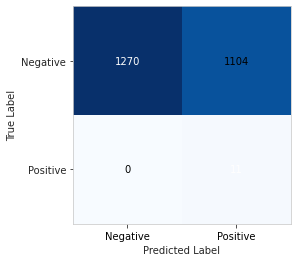

Accuracy of DecisionTreeClassifier is 0.8150943396226416
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1339
           1       0.77      0.82      0.80      1046

    accuracy                           0.82      2385
   macro avg       0.81      0.82      0.81      2385
weighted avg       0.82      0.82      0.82      2385



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9e1a7e50f0>)

([<matplotlib.axis.XTick at 0x7f9e1d0fb588>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f9e1d0f3358>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

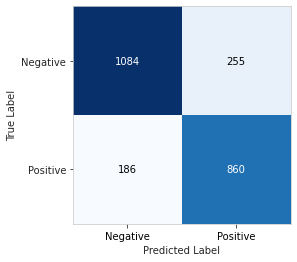

Accuracy of RandomForestClassifier is 0.8440251572327044
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1462
           1       0.75      0.90      0.82       923

    accuracy                           0.84      2385
   macro avg       0.84      0.85      0.84      2385
weighted avg       0.86      0.84      0.85      2385



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9e1cfdd710>)

([<matplotlib.axis.XTick at 0x7f9e1cfb6828>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f9e1cfc35f8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

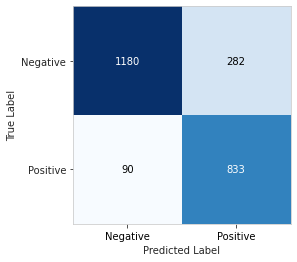

Accuracy of GradientBoostingClassifier is 0.8163522012578617
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      1676
           1       0.62      0.98      0.76       709

    accuracy                           0.82      2385
   macro avg       0.80      0.86      0.81      2385
weighted avg       0.88      0.82      0.82      2385



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9e1cf3b9e8>)

([<matplotlib.axis.XTick at 0x7f9e1cf34a90>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f9e1ce8f860>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

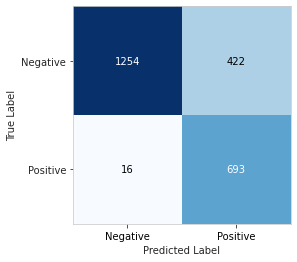

Accuracy of GaussianNB is 0.5844863731656185
              precision    recall  f1-score   support

           0       0.35      0.73      0.47       611
           1       0.85      0.53      0.66      1774

    accuracy                           0.58      2385
   macro avg       0.60      0.63      0.57      2385
weighted avg       0.72      0.58      0.61      2385



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9e1d0f6940>)

([<matplotlib.axis.XTick at 0x7f9e1cced6d8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f9e1cd054a8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

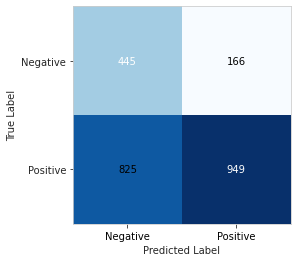

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['Category'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['Category'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Category'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['Category']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['Category'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Negative','Positive'],color='black')
    plt.yticks(range(2), ['Negative','Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Comparison of Model Accuracies

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x7f9e1cb2d4a8>,
 [Text(0, 0, 'SVC'),
  Text(0, 0, 'DecisionTreeClassifier'),
  Text(0, 0, 'RandomForestClassifier'),
  Text(0, 0, 'GradientBoostingClassifier'),
  Text(0, 0, 'GaussianNB')])

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Model')

Text(0.5, 1.0, 'Classifier Accuracies')

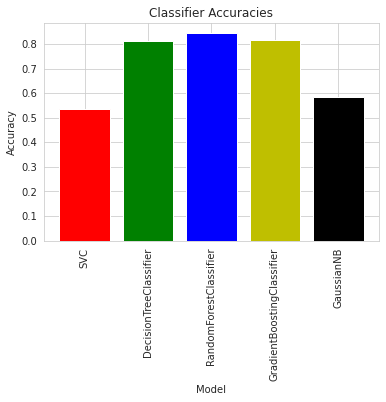

In [ ]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy,color='rgbyk')
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')